# Sentiment Analysis on a Pre-Trained Model to evaluate Emotion

In [150]:
from transformers import AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from huggingface_hub import notebook_login
from transformers import AutoTokenizer
from transformers import pipeline
from datasets import load_metric
from tqdm import tqdm

In [91]:
mental = pd.read_csv('sentimentscores_groupwise.csv', sep=';')
mental

,Uuid,sentiment_type,sentiment_score,Title,Group
0,1,compound,0.0000,mental health,7
1,2,compound,-0.2960,i am worried about the elderly health how to c...,7
2,3,compound,0.0000,health,7
3,4,compound,-0.1779,anxiety,7
4,5,compound,0.0000,stigma in society,7
...,...,...,...,...,...
450,456,compound,-0.4215,stress,13
451,457,compound,0.0000,toxic environtmant,13
452,458,compound,0.0000,overthink,13
453,459,compound,0.0000,social expectations,13


In [116]:
mental_detailled = pd.concat([mental['sentiment_score'], mental['Title'], df['label'], df['score'], mental['Group']], axis=1)
mental_detailled

,sentiment_score,Title,label,score,Group
0,0.0000,mental health,sadness,0.498661,7
1,-0.2960,i am worried about the elderly health how to c...,fear,0.880542,7
2,0.0000,health,joy,0.547417,7
3,-0.1779,anxiety,fear,0.973782,7
4,0.0000,stigma in society,sadness,0.890355,7
...,...,...,...,...,...
450,-0.4215,stress,sadness,0.399457,13
451,0.0000,toxic environtmant,anger,0.751312,13
452,0.0000,overthink,anger,0.517478,13
453,0.0000,social expectations,anger,0.301479,13


In [120]:
#mental_detailled.to_csv('mentalhealth_sentiment_analysis.csv', index = False)

## Testing on pretrained model

In [113]:
mm = mental['Title'].tolist()

In [121]:
classifier = pipeline("sentiment-analysis",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier(mm)
print(prediction)

loading configuration file https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion/resolve/main/config.json from cache at /Users/dianakozachek/.cache/huggingface/transformers/690674b44bd5b1a7ef81fea02641d3b53827649f92ae54381924832f1edefaac.49a3ba1a12c5b0c12c1f5d39ce0fc262dc3810bdc41be4d875eaf3181375d3f3
Model config DistilBertConfig {
  "_name_or_path": "./",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "s

[[{'label': 'sadness', 'score': 0.4986608326435089}, {'label': 'joy', 'score': 0.06363709270954132}, {'label': 'love', 'score': 0.004562999587506056}, {'label': 'anger', 'score': 0.05026960000395775}, {'label': 'fear', 'score': 0.37770646810531616}, {'label': 'surprise', 'score': 0.005163032561540604}], [{'label': 'sadness', 'score': 0.017529258504509926}, {'label': 'joy', 'score': 0.004364009015262127}, {'label': 'love', 'score': 0.0007645043660886586}, {'label': 'anger', 'score': 0.09622585028409958}, {'label': 'fear', 'score': 0.8805423378944397}, {'label': 'surprise', 'score': 0.0005741265485994518}], [{'label': 'sadness', 'score': 0.3123161494731903}, {'label': 'joy', 'score': 0.5474165678024292}, {'label': 'love', 'score': 0.016982482746243477}, {'label': 'anger', 'score': 0.04064754396677017}, {'label': 'fear', 'score': 0.07529531419277191}, {'label': 'surprise', 'score': 0.007341965567320585}], [{'label': 'sadness', 'score': 0.01292532216757536}, {'label': 'joy', 'score': 0.003

In [124]:
df = pd.DataFrame(prediction)
df.head()

,0,1,2,3,4,5
0,"{'label': 'sadness', 'score': 0.4986608326435089}","{'label': 'joy', 'score': 0.06363709270954132}","{'label': 'love', 'score': 0.004562999587506056}","{'label': 'anger', 'score': 0.05026960000395775}","{'label': 'fear', 'score': 0.37770646810531616}","{'label': 'surprise', 'score': 0.0051630325615..."
1,"{'label': 'sadness', 'score': 0.01752925850450...","{'label': 'joy', 'score': 0.004364009015262127}","{'label': 'love', 'score': 0.0007645043660886586}","{'label': 'anger', 'score': 0.09622585028409958}","{'label': 'fear', 'score': 0.8805423378944397}","{'label': 'surprise', 'score': 0.0005741265485..."
2,"{'label': 'sadness', 'score': 0.3123161494731903}","{'label': 'joy', 'score': 0.5474165678024292}","{'label': 'love', 'score': 0.016982482746243477}","{'label': 'anger', 'score': 0.04064754396677017}","{'label': 'fear', 'score': 0.07529531419277191}","{'label': 'surprise', 'score': 0.0073419655673..."
3,"{'label': 'sadness', 'score': 0.01292532216757...","{'label': 'joy', 'score': 0.0037777055986225605}","{'label': 'love', 'score': 0.0005149883800186217}","{'label': 'anger', 'score': 0.007993483915925026}","{'label': 'fear', 'score': 0.9737815260887146}","{'label': 'surprise', 'score': 0.0010068782139..."
4,"{'label': 'sadness', 'score': 0.8903547525405884}","{'label': 'joy', 'score': 0.008158751763403416}","{'label': 'love', 'score': 0.001609831117093563}","{'label': 'anger', 'score': 0.08765561878681183}","{'label': 'fear', 'score': 0.011162379756569862}","{'label': 'surprise', 'score': 0.0010587207507..."


In [129]:
def transform_df(df):
    labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    new_df = pd.DataFrame(columns=labels)
    for i in range(df.shape[0]):
        row = {}
        for j in range(df.shape[1]):
            label = df.iloc[i, j]['label']
            score = df.iloc[i, j]['score']
            row[label] = score
        new_df = new_df.append(row, ignore_index=True)
    return new_df

new_df = transform_df(df)

In [134]:
new_df.head()

,sadness,joy,love,anger,fear,surprise
0,0.498661,0.063637,0.004563,0.050270,0.377706,0.005163
1,0.017529,0.004364,0.000765,0.096226,0.880542,0.000574
2,0.312316,0.547417,0.016982,0.040648,0.075295,0.007342
3,0.012925,0.003778,0.000515,0.007993,0.973782,0.001007
4,0.890355,0.008159,0.001610,0.087656,0.011162,0.001059


In [265]:
mental_verydetailled = pd.concat([mental['sentiment_score'], mental['Title'], new_df['sadness'], new_df['joy'], new_df['love'], new_df['anger'],new_df['fear'], new_df['surprise'], mental['Group']], axis=1)
mental_verydetailled.head()

,sentiment_score,Title,sadness,joy,love,anger,fear,surprise,Group
0,0.0000,mental health,0.498661,0.063637,0.004563,0.050270,0.377706,0.005163,7
1,-0.2960,i am worried about the elderly health how to c...,0.017529,0.004364,0.000765,0.096226,0.880542,0.000574,7
2,0.0000,health,0.312316,0.547417,0.016982,0.040648,0.075295,0.007342,7
3,-0.1779,anxiety,0.012925,0.003778,0.000515,0.007993,0.973782,0.001007,7
4,0.0000,stigma in society,0.890355,0.008159,0.001610,0.087656,0.011162,0.001059,7


In [266]:
#mental_verydetailled.to_csv('mentalhealth_sentiment_analysis_full.csv', index = False)

## Visualize

In [267]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [268]:
def visualize_grouped_sentiments(mental_verydetailled):
    # Melt the data frame to have sentiment labels as columns
    df_melted = pd.melt(mental_verydetailled, id_vars=["sentiment_score", "Title", "Group"], value_vars=["sadness", "joy", "love", "anger", "fear", "surprise"])
    
    # Plot stacked bar plot
    plt.figure(figsize=(25,15), dpi=200)
    p = df_melted.groupby(['Group', 'variable'])['value'].sum().unstack().plot(kind='bar', stacked=True, color=["darkgrey", "mediumblue", "lightblue", "darkgreen", "mediumseagreen", "green"])
    plt.title("Sentiment Score Grouped by Group", fontsize=20)
    plt.xlabel("Group", fontsize=16)
    plt.ylabel("Sentiment Score", fontsize=16)
    plt.legend(title='Sentiment Label', fontsize=12)
    plt.show()

<Figure size 5000x3000 with 0 Axes>

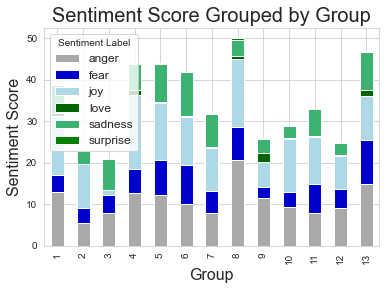

In [269]:
visualize_grouped_sentiments(mental_verydetailled)

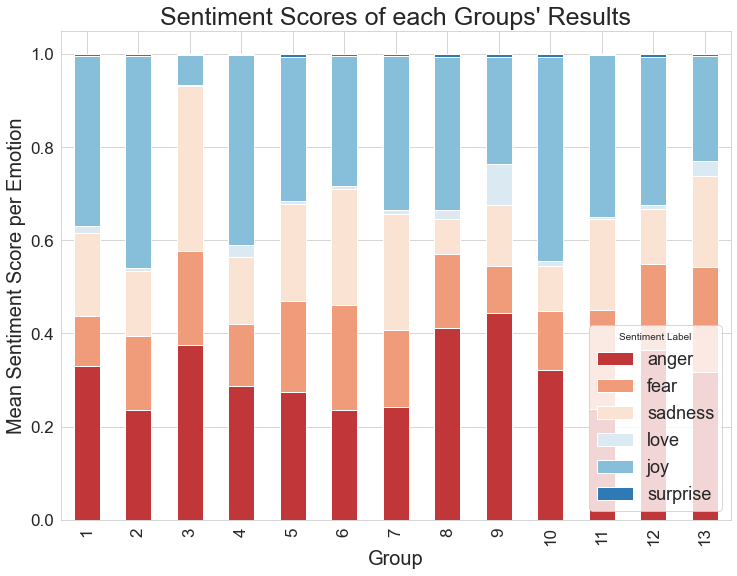

In [270]:
def visualize_grouped_sentiments(mental_verydetailled):
    # Melt the data frame to have sentiment labels as columns
    df_melted = pd.melt(mental_verydetailled, id_vars=["sentiment_score", "Title", "Group"], value_vars=["sadness", "joy", "love", "anger", "fear", "surprise"])
    
    # Pivot the data so that each sentiment label is a column and each group is a row
    pivot_df = df_melted.pivot_table(index='Group', columns='variable', values='value', aggfunc='mean')
    
    # Re-order the columns in the pivot table
    pivot_df = pivot_df[["anger", "fear", "sadness", "love", "joy", "surprise"]]
    
    # Set the color palette to RdBu
    sns.set_palette("RdBu", n_colors=6)
    
    # Plot the stacked bar plot
    fig, ax = plt.subplots(figsize=(12, 9))
    pivot_df.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels and titles
    ax.set_title("Sentiment Scores of each Groups' Results", fontsize=25)
    ax.set_xlabel("Group", fontsize=20)
    ax.set_ylabel("Mean Sentiment Score per Emotion", fontsize=20)
    ax.legend(title='Sentiment Label', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=17)
    plt.show()
    
visualize_grouped_sentiments(mental_verydetailled)

In [271]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statistics

import scipy.stats as stats
from collections import Counter
from scipy.stats import f_oneway, pearsonr, spearmanr, kruskal, ttest_1samp, ttest_rel, levene, skew, friedmanchisquare
from scikit_posthocs import posthoc_conover

from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [359]:
perfsent = pd.read_csv('mentalhealth_sentiment_analysis_performance.csv', delimiter = ';')
perfsent.head()

,sentiment_score,Title,sadness,joy,love,anger,fear,surprise,solutions,problems,Group
0,0.0000,mental health,0.498661,0.063637,0.004563,0.050270,0.377706,0.005163,14,17,7
1,-0.2960,i am worried about the elderly health how to c...,0.017529,0.004364,0.000765,0.096226,0.880542,0.000574,14,17,7
2,0.0000,health,0.312316,0.547417,0.016982,0.040648,0.075295,0.007342,14,17,7
3,-0.1779,anxiety,0.012925,0.003778,0.000515,0.007993,0.973782,0.001007,14,17,7
4,0.0000,stigma in society,0.890355,0.008159,0.001610,0.087656,0.011162,0.001059,14,17,7


In [393]:
mean_df = perfsent.groupby('Group').mean().reset_index()
#mean_df

## Exploratory Data Analysis on a group - level

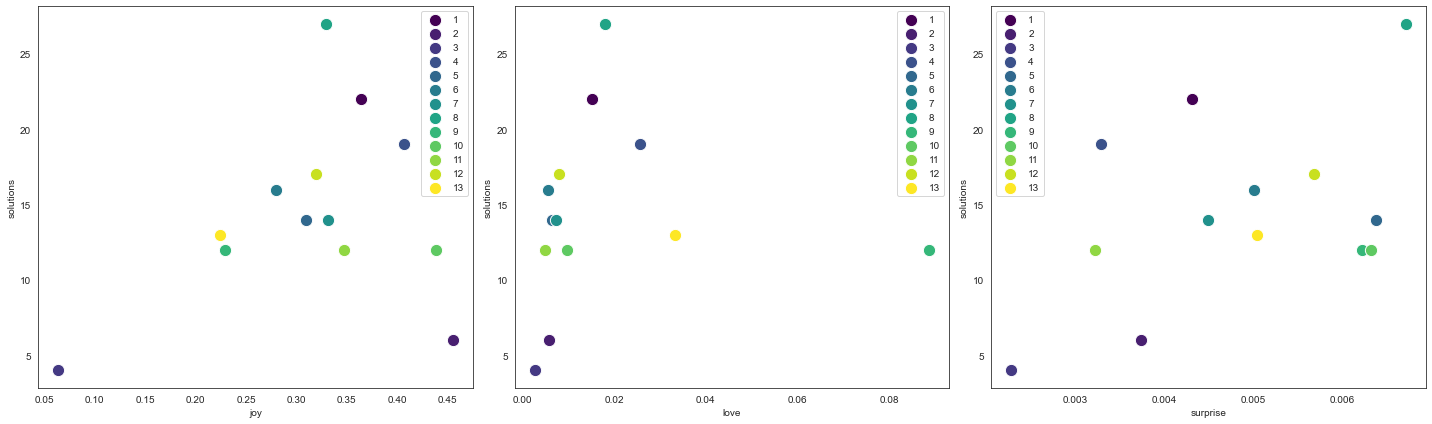

In [403]:
plt.figure(figsize=(20, 6))
sns.set_style("white")

independents = ['joy', 'love', 'surprise']
groups = mean_df.Group.unique()
colors = plt.cm.viridis(np.linspace(0,1,len(groups)))

for i, independent in enumerate(independents):
    plt.subplot(1, 3, i+1)
    for j, group in enumerate(groups):
        group_df = mean_df[mean_df.Group == group]
        sns.scatterplot(x=independent, y='solutions', data=group_df, color=colors[j], label=str(group),s=150)
        
    plt.xlabel(independent)
    plt.ylabel('solutions')
    plt.legend()

plt.tight_layout()
plt.show()

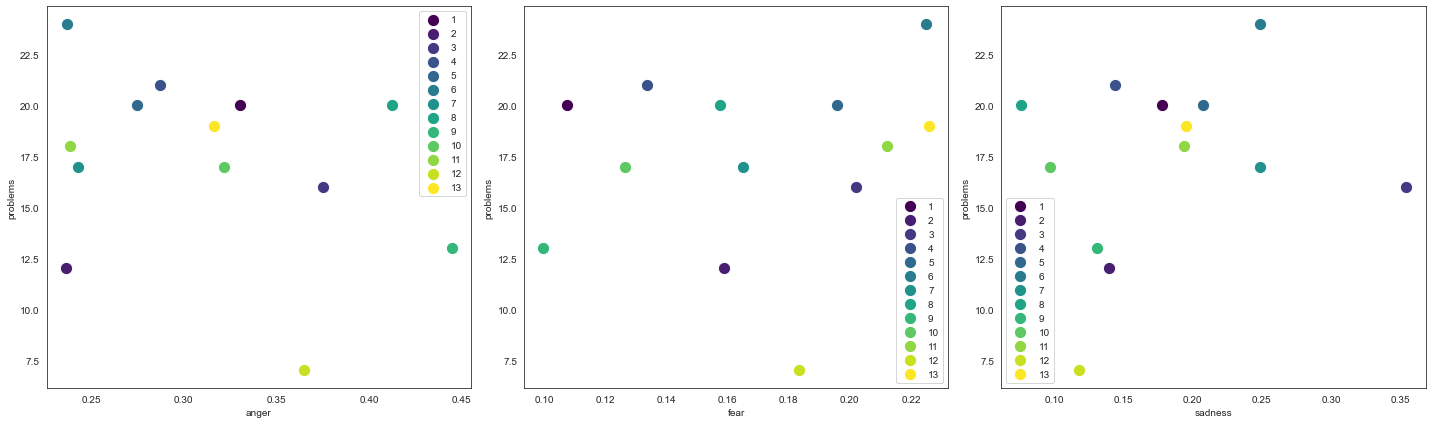

In [404]:
plt.figure(figsize=(20, 6))
sns.set_style("white")

independents = ['anger', 'fear', 'sadness']
groups = mean_df.Group.unique()
colors = plt.cm.viridis(np.linspace(0,1,len(groups)))

for i, independent in enumerate(independents):
    plt.subplot(1, 3, i+1)
    for j, group in enumerate(groups):
        group_df = mean_df[mean_df.Group == group]
        sns.scatterplot(x=independent, y='problems', data=group_df, color=colors[j], label=str(group),s=150)
        
    plt.xlabel(independent)
    plt.ylabel('problems')
    plt.legend()

plt.tight_layout()
plt.show()

## Exploratory Analysis on an individual level

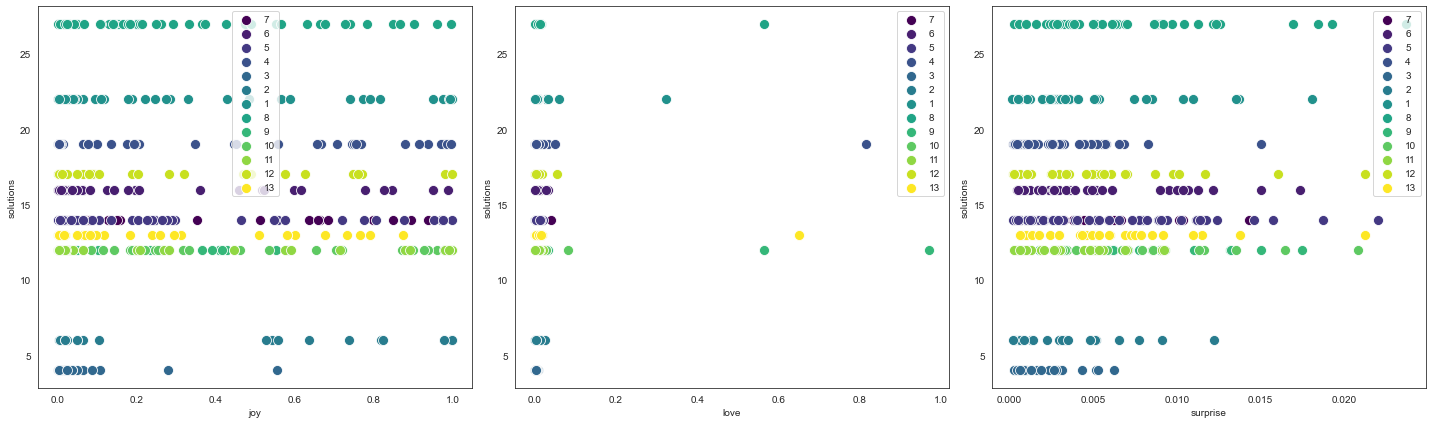

In [399]:
plt.figure(figsize=(20, 6))
sns.set_style("white")

independents = ['joy', 'love', 'surprise']
groups = perfsent.Group.unique()
colors = plt.cm.viridis(np.linspace(0,1,len(groups)))

for i, independent in enumerate(independents):
    plt.subplot(1, 3, i+1)
    for j, group in enumerate(groups):
        group_df = perfsent[perfsent.Group == group]
        sns.scatterplot(x=independent, y='solutions', data=group_df, color=colors[j], label=str(group),s=100)
        
    plt.xlabel(independent)
    plt.ylabel('solutions')
    plt.legend()

plt.tight_layout()
plt.show()

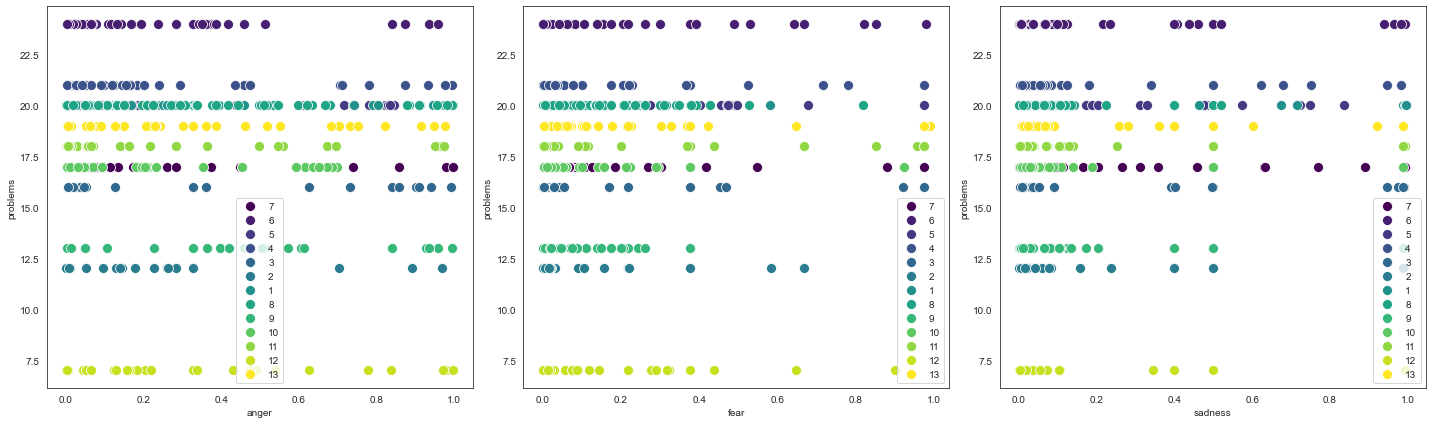

In [400]:
plt.figure(figsize=(20, 6))
sns.set_style("white")

independents = ['anger', 'fear', 'sadness']
groups = perfsent.Group.unique()
colors = plt.cm.viridis(np.linspace(0,1,len(groups)))

for i, independent in enumerate(independents):
    plt.subplot(1, 3, i+1)
    for j, group in enumerate(groups):
        group_df = perfsent[perfsent.Group == group]
        sns.scatterplot(x=independent, y='problems', data=group_df, color=colors[j], label=str(group),s=100)
        
    plt.xlabel(independent)
    plt.ylabel('problems')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#.drop([1,9], axis=0)

In [451]:
mean_df = perfsent.groupby('Group').mean().reset_index()

,Group,sentiment_score,sadness,joy,love,anger,fear,surprise,solutions,problems
0,1,-0.000449,0.178088,0.364453,0.015153,0.330543,0.107456,0.004307,22.0,20.0
2,3,-0.213148,0.354447,0.063521,0.002570,0.375184,0.202000,0.002278,4.0,16.0
3,4,0.027118,0.143670,0.406620,0.025639,0.287249,0.133535,0.003288,19.0,21.0
4,5,-0.080402,0.207671,0.309224,0.006346,0.274722,0.195666,0.006371,14.0,20.0
5,6,-0.129569,0.248379,0.279383,0.005583,0.236710,0.224946,0.004999,16.0,24.0
6,7,-0.012578,0.248631,0.331641,0.007328,0.242851,0.165064,0.004485,14.0,17.0
7,8,0.022756,0.075747,0.329399,0.017901,0.412612,0.157633,0.006708,27.0,20.0
8,9,-0.015254,0.130988,0.229560,0.088834,0.444599,0.099801,0.006217,12.0,13.0
10,11,-0.024215,0.194081,0.346978,0.004906,0.238631,0.212183,0.003221,12.0,18.0
11,12,0.021124,0.118216,0.319767,0.007911,0.365040,0.183388,0.005678,17.0,7.0


## Multiple linear regression

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               problems   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.289
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Thu, 09 Feb 2023   Prob (F-statistic):              0.858
Time:                        21:50:06   Log-Likelihood:                -31.217
No. Observations:                  11   AIC:                             70.43
Df Residuals:                       7   BIC:                             72.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0682      6.998      2.439      0.0

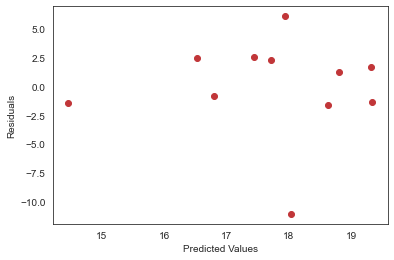

In [470]:
X = mean_df[['joy','surprise','love']]
y = mean_df['problems']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               problems   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2428
Date:                Thu, 09 Feb 2023   Prob (F-statistic):              0.866
Time:                        21:50:19   Log-Likelihood:                -1271.3
No. Observations:                 455   AIC:                             2551.
Df Residuals:                     451   BIC:                             2567.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1778      0.330     55.061      0.0

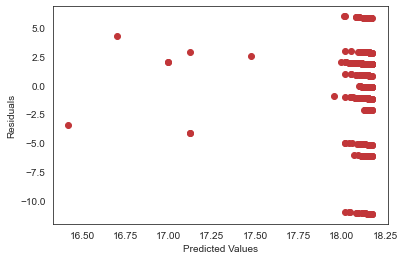

In [471]:
X = perfsent[['joy', 'surprise', 'love']]
y = perfsent['problems']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               problems   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9295
Date:                Thu, 09 Feb 2023   Prob (F-statistic):              0.426
Time:                        21:50:37   Log-Likelihood:                -1270.2
No. Observations:                 455   AIC:                             2548.
Df Residuals:                     451   BIC:                             2565.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0890      0.399     45.391      0.0

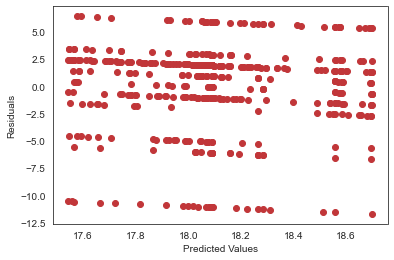

In [472]:
X = perfsent[['fear', 'anger', 'sadness']]
y = perfsent['problems']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               problems   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                 -0.058
Method:                 Least Squares   F-statistic:                    0.8162
Date:                Thu, 09 Feb 2023   Prob (F-statistic):              0.525
Time:                        21:50:54   Log-Likelihood:                -30.131
No. Observations:                  11   AIC:                             68.26
Df Residuals:                       7   BIC:                             69.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4490     12.847      2.370      0.0

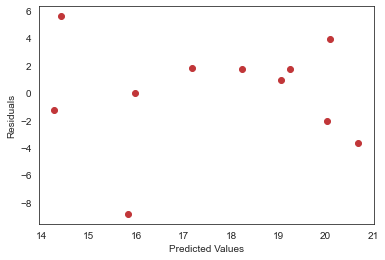

In [473]:
X = mean_df[['fear', 'anger', 'sadness']]
y = mean_df['problems']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Datacleaning, splitting

In [72]:
#all lowercase, all string, drop nan
mindmap = mental['Title'].str.lower().dropna()

In [73]:
train, test = train_test_split(mindmap, test_size=0.2)
#train.head()
#test.head()

## Training the Model

In [74]:
tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

loading configuration file https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion/resolve/main/config.json from cache at /Users/dianakozachek/.cache/huggingface/transformers/690674b44bd5b1a7ef81fea02641d3b53827649f92ae54381924832f1edefaac.49a3ba1a12c5b0c12c1f5d39ce0fc262dc3810bdc41be4d875eaf3181375d3f3
Model config DistilBertConfig {
  "_name_or_path": "./",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "s

In [75]:
def preprocess_function(example):
    return tokenizer(example, truncation=True)
 
tokenized_train = train.map(preprocess_function)
tokenized_test = test.map(preprocess_function)

In [76]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [110]:
model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion", num_labels=6)

In [78]:
def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    return {"accuracy": accuracy, "f1": f1}

Huggingface init

In [79]:
notebook_login() #yourkeygoeshere

Token is valid.
Your token has been saved in your configured git credential helpers (osxkeychain).
Your token has been saved to /Users/dianakozachek/.cache/huggingface/token
Login successful


In [80]:
from transformers import TrainingArguments, Trainer
 
repo_name = "finetuning-sentiment-mindmapping"
 
training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=False,
)
 
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [109]:
#trainer.train()

In [108]:
#trainer.evaluate()